<a href="https://colab.research.google.com/github/vforjj/AI-ML-Review/blob/main/Chapter05_%EC%9C%A0%EB%B0%A9%EC%95%94_%ED%99%98%EC%9E%90_%EB%B6%84%EB%A5%98_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[Chapter 05]**  
**┗ 유방암 환자 분류 모델**
---
> **목차(Context)**

* 문제상황 및 데이터 살펴보기
* Data Spec Check
* 문제해결 프로세스 정의
* Data Info Check
* 🥉Session 1 - 「Data Readiness Check」
* 🥈Session 2 - 「Feature Engineering」
* 🥇Session 3 - 「Modeling」

In [ ]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# ▶ 경로 설정 (※ Colab을 활성화시켰다면 보통 Colab Notebooks 폴더가 자동 생성)
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/00.fast_campus/00.HyperDifference/03.Part4/Chapter05")
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/Colab Notebooks/00.fast_campus/00.HyperDifference/03.Part4/Chapter05'

# **문제상황 및 데이터 살펴보기**
---
> **시나리오** 🏭

```
세상에는 다양한 질병이 있다.
현대 질병 중 발병 빈도가 높으면서 치명률이 높은 것은 단연 암이라고 할 수 있다.
본 실전 프로젝트에서는 유방암 의심 환자들의 데이터를 이용하여 유방암 환자를 분류할 수 있는 모델을 만들어보자.
우리는 대부분이 의료 전문가가 아니기 때문에 데이터의 정확한 특성을 이해하는 것은 어려운 일이다.
이번 프로젝트에서는 데이터의 분석보다는 모델링 방법에 집중하여 문제를 해결하는 것에 집중해보도록 하자.
```



> **데이터 살펴보기**

* 유방암 검사를 받은 사람들의 검진데이터
* 데이터 명세 ⬇

|Column|Description|
|:---|:---|
|id||
|radius_mean||
|texture_mean||
|smoothness_mean||
|perimeter_mean||
|area_mean||
|smoothness_mean||
|compactness_mean||
|concavity_mean||
|concave points_mean||
|symmetry_mean||
|fractal_dimension_mean||
|radius_se||
|texture_se||
|perimeter_se||
|area_se||
|smoothness_se||
|compactness_se||
|concavity_se||
|points_se||
|concave||
|symmetry_se||
|fractal_dimension_se||
|radius_worst||
|texture_worst||
|perimeter_worst||
|area_worst||
|smoothness_worst||
|compactness_worst||
|concavity_worst||
|concave points_worst||
|symmetry_worst||
|fractal_dimension_worst||

# **Data Spec Check**
---
> **Data 가공 명세서**

<img src = "https://drive.google.com/uc?id=16qPjbhZaqZj82KlvPPAHNGbFVYsScT4w">

In [ ]:
import pandas as pd
df = pd.read_csv('data/data.csv')

In [ ]:
df.shape

(569, 33)

In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

# **문제해결 프로세스 정의**
---
> **문제정의**

```
▶ Context) 병원에는 다양한 환자들이 내원한다. X-ray, CT 등 다양한 검사들을 진행하고 이를 의사의 분석을 통해 최종 병명을 진단한다.
의사들의 의사결정에는 그들의 노하우가 녹아있고, 이에 따라 진단의 정확도가 정해진다.
▶ As-IS) 현재는, 의사가 X-ray 혹은 CT 사진을 보고 환부의 생김새, 음영 등을 보고 진단을 내리고 있다.
하지만, 처음 접하는 특성일 경우에는 진단의 어려움이 있다.
▶ To-BE) 영상 자료에서 추출할 수 있는 다양한 환부의 특성을 데이터로 변환하고 양성 진단 환자와 음성 진단 환자의 특성을 학습하여
환자의 데이터를 이용하여 양성/음성 환자를 분류하고자 한다.
▶ Goal) 이러한 Needs에 맞춰 환자의 양성/음성 여부를 판단할 수 있는 모델을 작성해보자.
```  

> **기대효과**

```
▶ 모델만으로 환자를 분류할 수는 없다.
하지만, 의사가 의사결정에 참고할 수 있는 기반 자료로는 충분하게 활용할 수 있으므로, 혹시 놓칠 수 있는 양성 환자를 최소화할 수 있다.
```

> **해결방안**

```
▶ 수집된 데이터를 학습할 수 있는 형태로 변환하고, 각 데이터의 특성을 눈으로 확인하기 위해 데이터를 시각화한다.
  이러한 Binary classification에 유용한 알고리즘들을 적용해보고, 각 알고리즘의 성능을 비교해보도록 하자.
  최종 배포에는 어떤 알고리즘이 좋을지에 대해 고민해보자.
▶ Session 1 🥉
 - Data Loading
 - Data Characteristic Analysis
 - Data Preprocessing
▶ Session 2 🥈
 - Data visualization
▶ Session 3 🥇
 - Modeling (Logistic Regression, K-Nearest Neighbors, Linear Discriminant Analysis, Support Vector Machine, Random Forest)
 - Compare models
```

> **성과측정**  

```
▶ 양성/음성 환자 분류 정확도
```

> **현업적용**  

```
▶ Binary classificaton 문제 상황에서 적용할 수 있는 다양한 알고리즘에 대한 이해
```

> **주요 핵심 미리 살펴보기**  

```
▶ Session 1 → Data Loading, Data Characteristic Analysis, Data Preprocessing
▶ Session 2 → Data Visualization
▶ Session 3 → Logistic Regression, K-Nearest Neighbors, Linear Discriminant Analysis, Support Vector Machine, Random Forest
```

# Data Info Check

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from time import time
from pprint import pprint

from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, cohen_kappa_score, precision_recall_fscore_support

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

df = pd.read_csv('data/data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.shape

(569, 33)

In [ ]:
# 수치형 데이터를 가진 컬럼을 살펴보자.
df.select_dtypes(include=np.number).columns.tolist()

['id',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'Unnamed: 32']

In [ ]:
# DataFrame의 describe 함수를 통해 수치형 컬럼의 통계량을 확인하자.
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
class_mapping = {'M': 'malignant', 'B': 'benign'}
df['diagnosis'] = df['diagnosis'].map(class_mapping)
df = df.drop('Unnamed: 32', axis=1)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,malignant,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,malignant,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,malignant,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,malignant,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,malignant,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.shape

(569, 32)

In [ ]:
['{}: {}'.format(i, name) for (i, name) in enumerate(list(df.columns[2:]))]

['0: radius_mean',
 '1: texture_mean',
 '2: perimeter_mean',
 '3: area_mean',
 '4: smoothness_mean',
 '5: compactness_mean',
 '6: concavity_mean',
 '7: concave points_mean',
 '8: symmetry_mean',
 '9: fractal_dimension_mean',
 '10: radius_se',
 '11: texture_se',
 '12: perimeter_se',
 '13: area_se',
 '14: smoothness_se',
 '15: compactness_se',
 '16: concavity_se',
 '17: concave points_se',
 '18: symmetry_se',
 '19: fractal_dimension_se',
 '20: radius_worst',
 '21: texture_worst',
 '22: perimeter_worst',
 '23: area_worst',
 '24: smoothness_worst',
 '25: compactness_worst',
 '26: concavity_worst',
 '27: concave points_worst',
 '28: symmetry_worst',
 '29: fractal_dimension_worst']

In [ ]:
X = df.iloc[:, 2:].values
y = np.where(df['diagnosis'] == 'malignant', 1, 0)

print('Class labels:', np.unique(y), np.unique(df['diagnosis']),
      [(i, val) for (i, val) in enumerate(np.bincount(y))])

Class labels: [0 1] ['benign' 'malignant'] [(0, 357), (1, 212)]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
print('Labels counts in y:',       np.bincount(y),
      [round(cnt / np.sum(np.bincount(y)) * 100, 1) for cnt in np.bincount(y)])

print('Labels counts in y_train:', np.bincount(y_train),
      [round(cnt / np.sum(np.bincount(y_train)) * 100, 1) for cnt in np.bincount(y_train)])

print('Labels counts in y_test:',  np.bincount(y_test),
      [round(cnt / np.sum(np.bincount(y_test)) * 100, 1) for cnt in np.bincount(y_test)])

Labels counts in y: [357 212] [62.7, 37.3]
Labels counts in y_train: [250 148] [62.8, 37.2]
Labels counts in y_test: [107  64] [62.6, 37.4]


# 🥉Session 1 - 「Data Readiness Check」

In [ ]:
data = pd.DataFrame(np.hstack((y_train.reshape(-1,1), X_train)),
                    columns=['target']+list(df.iloc[:, 2:].columns))

data.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
target,398.0,0.37,0.48,0.00,0.00,0.00,1.00,1.00
radius_mean,398.0,14.13,3.52,6.98,11.71,13.38,15.77,27.42
texture_mean,398.0,19.32,4.38,9.71,16.02,18.90,21.90,33.81
perimeter_mean,398.0,92.08,24.37,43.79,75.18,86.96,104.25,186.90
area_mean,398.0,655.06,350.36,143.50,420.48,548.75,782.68,2501.00
smoothness_mean,398.0,0.10,0.01,0.05,0.09,0.10,0.11,0.16
compactness_mean,398.0,0.11,0.05,0.03,0.07,0.10,0.13,0.35
concavity_mean,398.0,0.09,0.08,0.00,0.03,0.06,0.14,0.43
concave points_mean,398.0,0.05,0.04,0.00,0.02,0.03,0.08,0.19
symmetry_mean,398.0,0.18,0.03,0.11,0.16,0.18,0.20,0.30


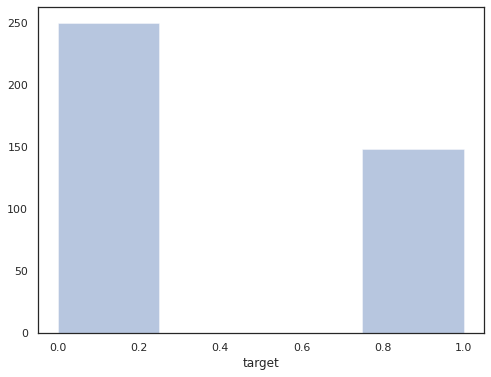

In [ ]:
plt.subplots(figsize=(8,6))
sns.distplot(data.target, kde=False);

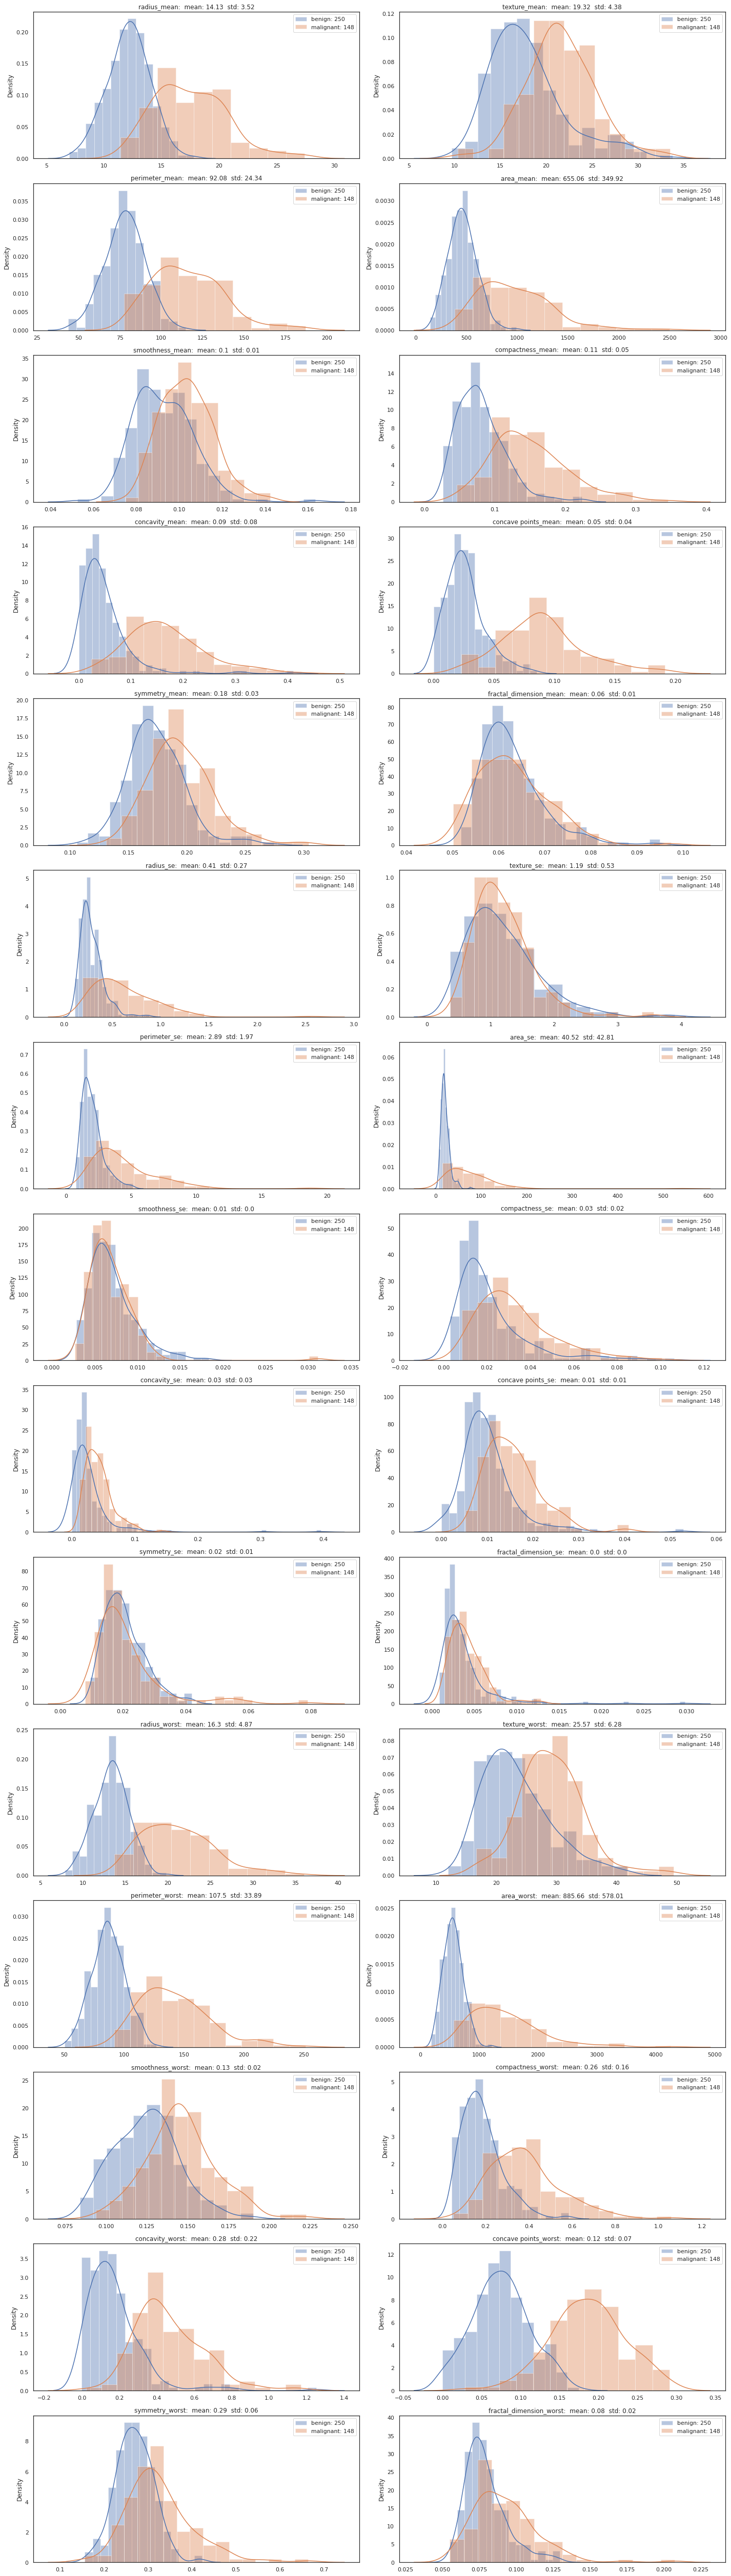

In [ ]:
f, axs = plt.subplots(15, 2, figsize=(20,70))

for i, feat in enumerate(X_train.T):
    sns.distplot(feat[y_train==0], ax=axs.flat[i], label='{}: {}'.format(np.unique(df['diagnosis'])[0], len(y_train[y_train==0])))
    sns.distplot(feat[y_train==1], ax=axs.flat[i], label='{}: {}'.format(np.unique(df['diagnosis'])[1], len(y_train[y_train==1])))
    axs.flat[i].set_title('{}:  mean: {}  std: {}'.format(list(df.iloc[:, 2:].columns)[i], abs(feat.mean().round(2)), feat.std().round(2)))
    axs.flat[i].legend()
plt.tight_layout()

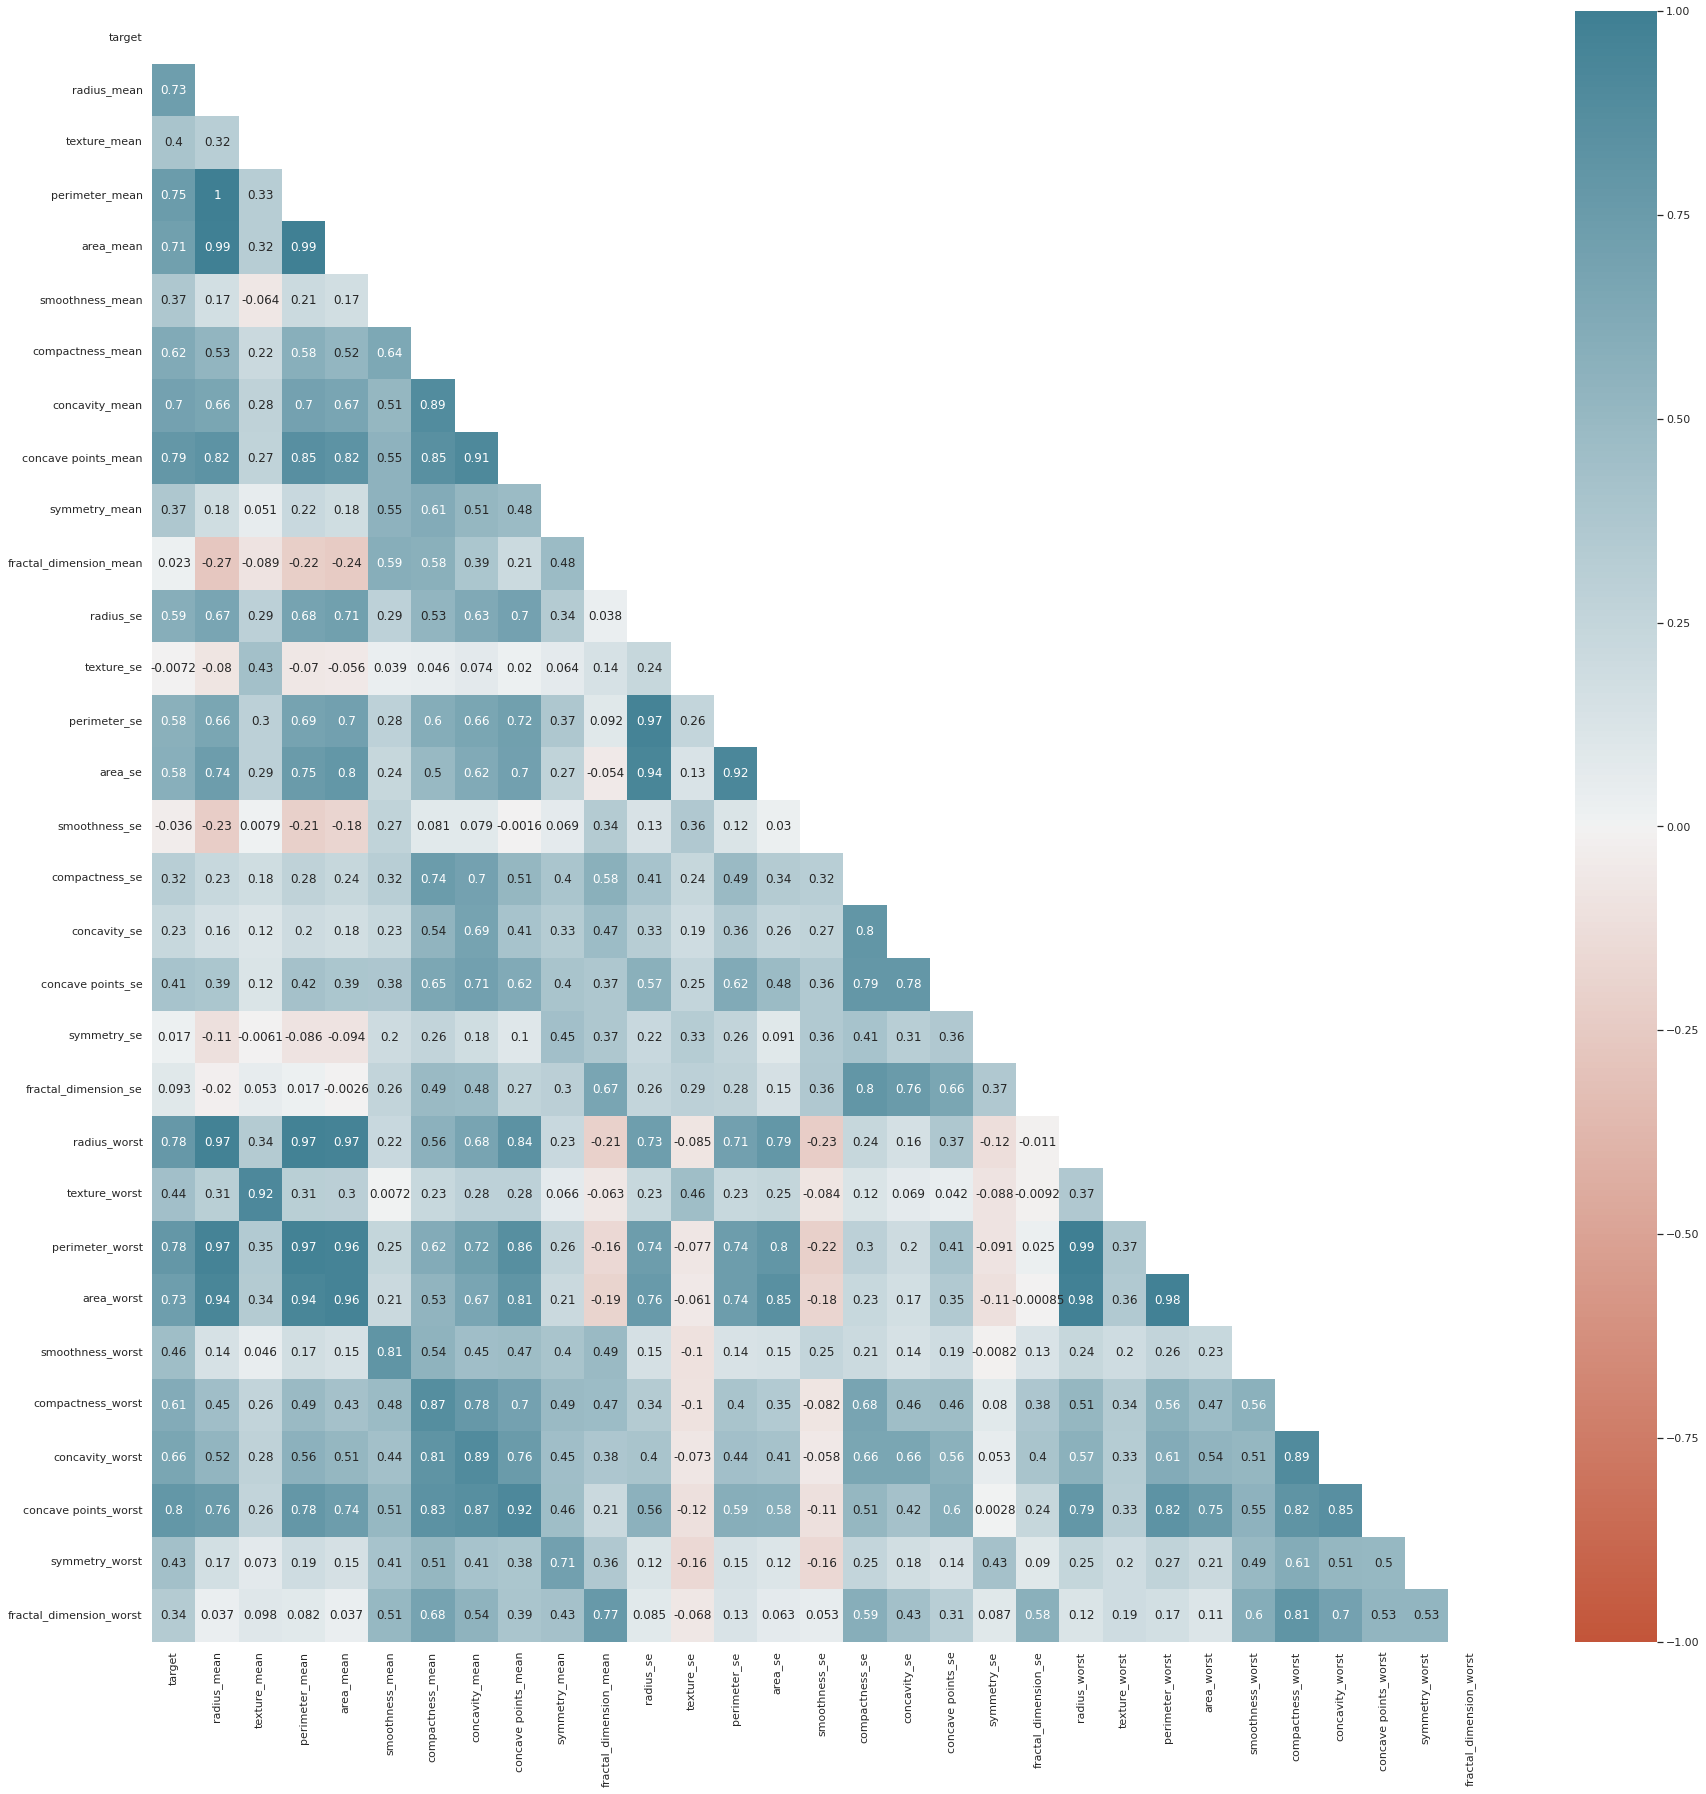

In [ ]:
plt.figure(figsize=(30, 30))

matrix = np.triu(data.corr())
sns.heatmap(data.corr(),
            annot=True, fmt='.2g',
            mask=matrix,
            vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(20, 220, n=256));

# 🥈Session 2 - 「Feature Engineering」

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std  = sc.transform(X_test)

In [ ]:
X_train_std

array([[-0.07699373, -0.54554994, -0.04583536, ...,  0.72538264,
         1.14141654,  1.18028318],
       [-1.15983315, -0.40847363, -1.1366859 , ..., -0.76186189,
        -0.02784157, -0.41722915],
       [ 1.61121262,  0.51222226,  1.54586145, ...,  0.97125715,
         0.25176363, -0.09456005],
       ...,
       [ 0.57100467, -1.01846321,  0.50226055, ..., -0.05223252,
        -0.21212682, -0.77320251],
       [ 1.332687  ,  0.60589107,  1.29934155, ...,  0.80536591,
         0.15167768, -0.06234774],
       [-0.35267726, -0.82655638, -0.32851151, ..., -0.21812375,
        -1.44969756, -0.7104158 ]])

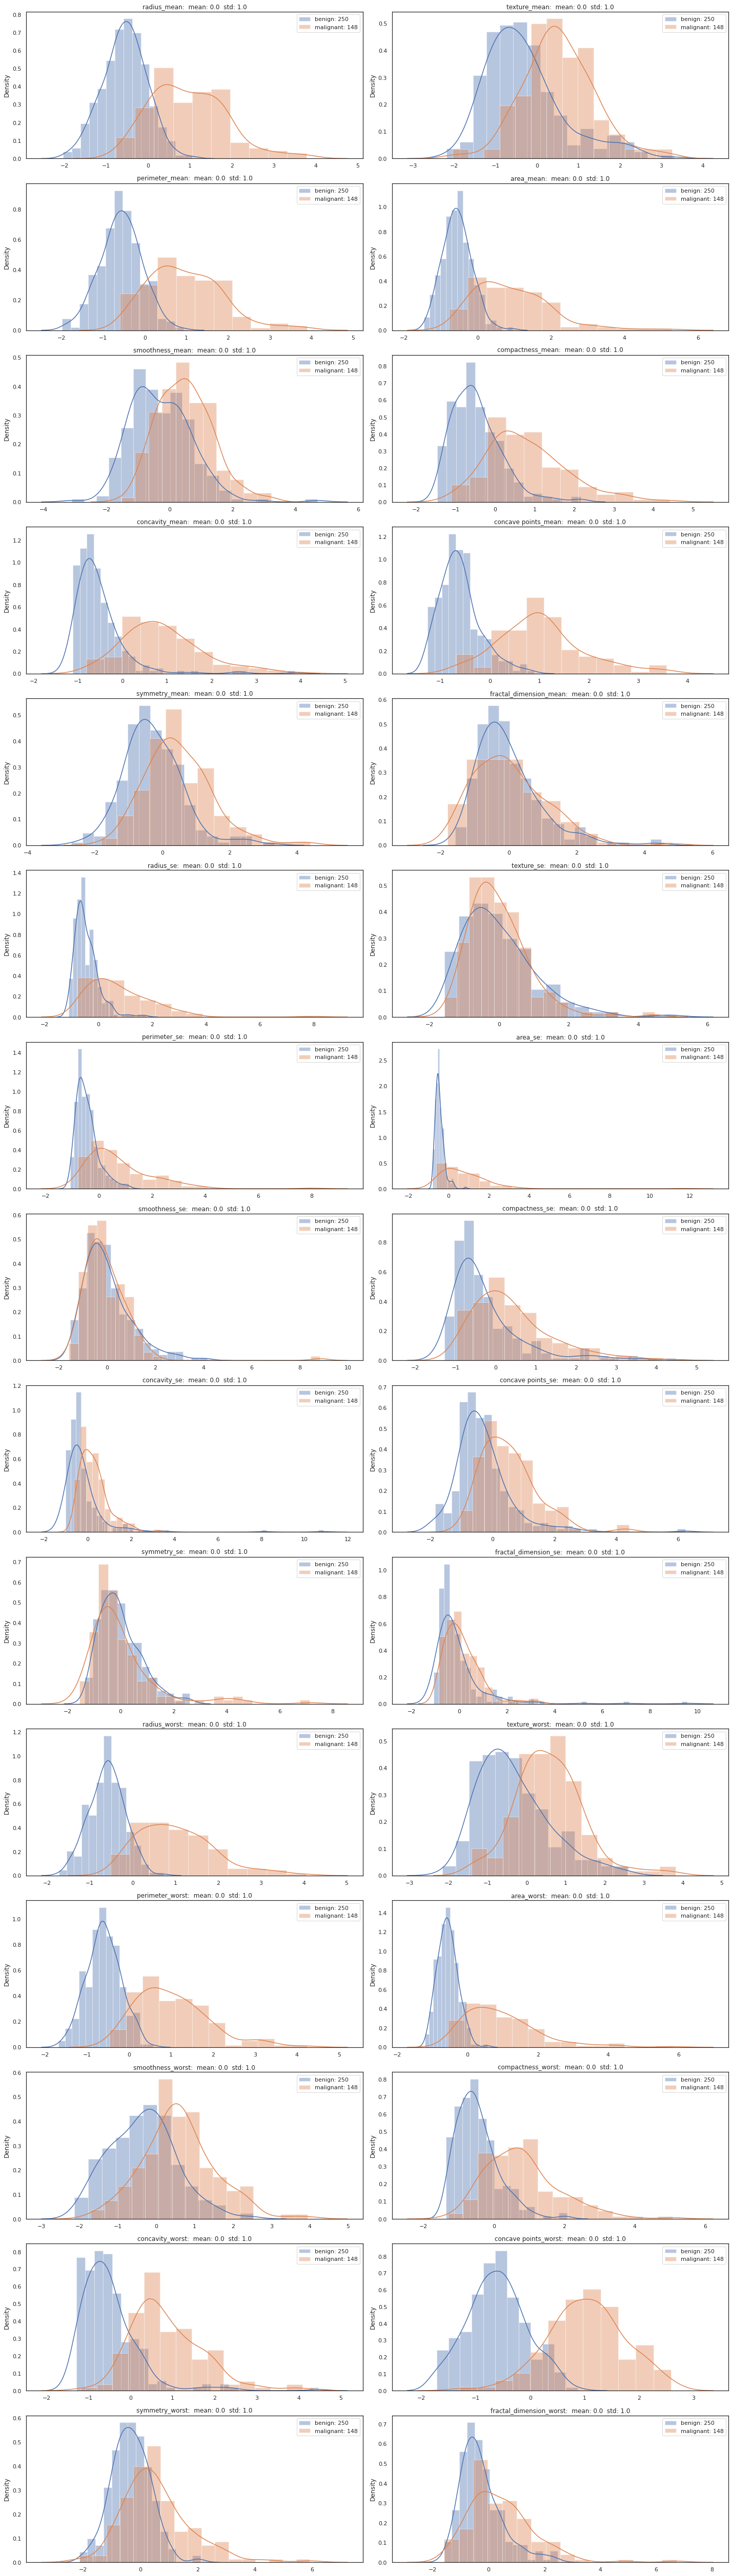

In [ ]:
f, axs = plt.subplots(15, 2, figsize=(20,70))

for i, feat in enumerate(X_train_std.T):
    sns.distplot(feat[y_train==0], ax=axs.flat[i], label='{}: {}'.format(np.unique(df['diagnosis'])[0], len(y_train[y_train==0])))
    sns.distplot(feat[y_train==1], ax=axs.flat[i], label='{}: {}'.format(np.unique(df['diagnosis'])[1], len(y_train[y_train==1])))
    axs.flat[i].set_title('{}:  mean: {}  std: {}'.format(list(df.iloc[:, 2:].columns)[i], abs(feat.mean().round(2)), feat.std().round(2)))
    axs.flat[i].legend()
plt.tight_layout()

# 🥇Session 3 - 「Modeling」

## DummyClassifier

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

def get_cross_val(clf, X, y, model_name, cv_num=5, metric='f1'):
    scores = cross_val_score(clf, X, y, cv=cv_num, scoring=metric)
    mean = scores.mean()
    std  = scores.std()
    p025 = np.quantile(scores, 0.025)
    p975 = np.quantile(scores, 0.975)
    metrics = ['mean', 'standard deviation', 'p025', 'p975']
    s = pd.Series([mean, std, p025, p975], index=metrics)  # np.where(lb < 0, 0, lb), np.where(ub > 1, 1, ub)
    s.name = model_name
    return s

def calculate_metrics(y_true, y_pred, duration, model_name, *args):
    acc     = accuracy_score(y_true, y_pred)
    pre     = precision_score(y_true, y_pred)
    rec     = recall_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    f1      = f1_score(y_true, y_pred)
    ck      = cohen_kappa_score(y_true, y_pred)
    p, r, fbeta, support = precision_recall_fscore_support(y_true, y_pred)
    metrics = ['accuracy', 'precision', 'recall', 'roc_auc', 'f1_score', 'cohen_kappa',
               'precision_both', 'recall_both', 'fbeta_both', 'support_both', 'time_to_fit (seconds)']
    s = pd.Series([acc, pre, rec, roc_auc, f1, ck, p, r, fbeta, support, duration], index=metrics)
    s.name = model_name
    return s

In [ ]:
d_clf = DummyClassifier(strategy='constant', constant=1)
d_clf.fit(X_train_std, y_train)

print('Accuracy (train): {:.2f}'.format(d_clf.score(X_train_std, y_train)))
print('Accuracy  (test): {:.2f}'.format(d_clf.score(X_test_std,  y_test)))

Accuracy (train): 0.37
Accuracy  (test): 0.37


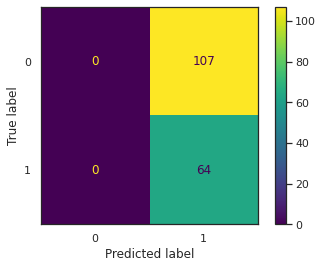

In [ ]:
predictions = d_clf.predict(X_test_std)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=d_clf.classes_)
disp.plot()

In [ ]:
y_pred = d_clf.predict(X_test_std)

print(classification_report(y_test, y_pred,
                            target_names=list(np.unique(df['diagnosis']))))

              precision    recall  f1-score   support

      benign       0.00      0.00      0.00       107
   malignant       0.37      1.00      0.54        64

    accuracy                           0.37       171
   macro avg       0.19      0.50      0.27       171
weighted avg       0.14      0.37      0.20       171



## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

lr_clf = LogisticRegressionCV(cv=5,
                              penalty='elasticnet', solver='saga',
                              Cs=np.power(10, np.arange(-3, 1, dtype=float)),
                              l1_ratios=np.linspace(0, 1, num=6, dtype=float),
                              max_iter=1000,
                              random_state=0)

start = time()
lr_clf.fit(X_train_std, y_train)
lr_duration = time() - start

print("LogisticRegressionCV took {:.2f} seconds for {} cv iterations with {} parameter settings.".format(lr_duration,
                                                                                                         lr_clf.n_iter_.shape[1],
                                                                                                         lr_clf.n_iter_.shape[2] * lr_clf.n_iter_.shape[3]))

print('Optimal regularization strength: {}  Optimal L1 Ratio: {}'.format(lr_clf.C_[0], lr_clf.l1_ratio_[0]))
print('Accuracy (train): {:.2f}'.format(lr_clf.score(X_train_std, y_train)))
print('Accuracy  (test): {:.2f}'.format(lr_clf.score(X_test_std,  y_test)))

LogisticRegressionCV took 7.60 seconds for 5 cv iterations with 24 parameter settings.
Optimal regularization strength: 1.0  Optimal L1 Ratio: 0.0
Accuracy (train): 1.00
Accuracy  (test): 0.96


In [ ]:
lr_params = dict(zip(list(df.iloc[:, 2:].columns), list(lr_clf.coef_[0])),
                 intercept=lr_clf.intercept_[0])
{param: value.round(2) for (param, value) in sorted(lr_params.items(), key=lambda item: item[1], reverse=True)}

{'symmetry_worst': 1.17,
 'smoothness_worst': 1.09,
 'radius_se': 1.02,
 'texture_worst': 0.99,
 'concavity_worst': 0.94,
 'radius_worst': 0.94,
 'texture_mean': 0.82,
 'concave points_worst': 0.81,
 'area_worst': 0.81,
 'area_se': 0.79,
 'perimeter_worst': 0.79,
 'perimeter_se': 0.78,
 'radius_mean': 0.72,
 'concave points_mean': 0.71,
 'perimeter_mean': 0.69,
 'smoothness_se': 0.67,
 'area_mean': 0.66,
 'concavity_mean': 0.61,
 'fractal_dimension_worst': 0.46,
 'concave points_se': 0.38,
 'compactness_worst': 0.05,
 'symmetry_mean': -0.01,
 'smoothness_mean': -0.06,
 'concavity_se': -0.18,
 'texture_se': -0.19,
 'symmetry_se': -0.22,
 'compactness_mean': -0.3,
 'fractal_dimension_mean': -0.33,
 'intercept': -0.46,
 'fractal_dimension_se': -0.51,
 'compactness_se': -0.82}

In [ ]:
lr_cv = get_cross_val(lr_clf, X_test_std, y_test, 'logistic regression')
lr_cv.round(2)

mean                  0.93
standard deviation    0.03
p025                  0.88
p975                  0.96
Name: logistic regression, dtype: float64

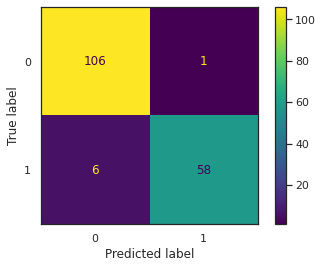

In [ ]:
predictions = lr_clf.predict(X_test_std)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_clf.classes_)
disp.plot()

In [ ]:
y_pred = lr_clf.predict(X_test_std)

print(classification_report(y_test, y_pred,
                            target_names=list(np.unique(df['diagnosis']))))

              precision    recall  f1-score   support

      benign       0.95      0.99      0.97       107
   malignant       0.98      0.91      0.94        64

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [ ]:
lr_metrics = calculate_metrics(y_test, y_pred, lr_duration, 'logistic_regression')
lr_metrics

accuracy                                                 0.959064
precision                                                0.983051
recall                                                    0.90625
roc_auc                                                  0.948452
f1_score                                                 0.943089
cohen_kappa                                              0.911208
precision_both           [0.9464285714285714, 0.9830508474576272]
recall_both                         [0.9906542056074766, 0.90625]
fbeta_both                [0.9680365296803651, 0.943089430894309]
support_both                                            [107, 64]
time_to_fit (seconds)                                    7.603112
Name: logistic_regression, dtype: object

## K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'weights': ['uniform', 'distance'],
              'n_neighbors': np.arange(1,16)}

knn_clf = KNeighborsClassifier()

gs_knn = GridSearchCV(knn_clf, param_grid=param_grid)

start = time()
gs_knn.fit(X_train_std, y_train)
knn_duration = time() - start

print("GridSearchCV of KNN took {:.2f} seconds for {} candidate parameter settings.".format(knn_duration,
                                                                                            len(gs_knn.cv_results_['params'])))
# report(gs_knn.cv_results_)
print('Optimal weights: {}  Optimal n_neighbors: {}'.format(gs_knn.best_params_['weights'], gs_knn.best_params_['n_neighbors']))
print('Accuracy (train): {:.2f}'.format(gs_knn.score(X_train_std, y_train)))
print('Accuracy  (test): {:.2f}'.format(gs_knn.score(X_test_std,  y_test)))

GridSearchCV of KNN took 0.86 seconds for 30 candidate parameter settings.
Optimal weights: distance  Optimal n_neighbors: 4
Accuracy (train): 1.00
Accuracy  (test): 0.96


In [ ]:
pprint(gs_knn.best_estimator_.get_params())

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 4,
 'p': 2,
 'weights': 'distance'}


In [ ]:
knn_cv = get_cross_val(gs_knn, X_test_std, y_test, 'k-nearest neighbors')
knn_cv.round(2)

mean                  0.91
standard deviation    0.05
p025                  0.83
p975                  0.96
Name: k-nearest neighbors, dtype: float64

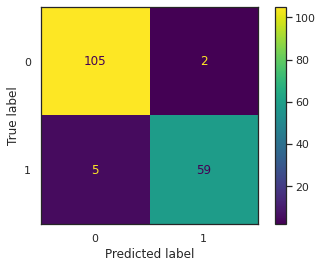

In [ ]:
predictions = gs_knn.predict(X_test_std)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gs_knn.classes_)
disp.plot()

In [ ]:
y_pred = gs_knn.predict(X_test_std)

print(classification_report(y_test, y_pred,
                            target_names=list(np.unique(df['diagnosis']))))

              precision    recall  f1-score   support

      benign       0.95      0.98      0.97       107
   malignant       0.97      0.92      0.94        64

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [ ]:
knn_metrics = calculate_metrics(y_test, y_pred, knn_duration, 'k-nearest neighbors')
knn_metrics

accuracy                                                 0.959064
precision                                                0.967213
recall                                                   0.921875
roc_auc                                                  0.951592
f1_score                                                    0.944
cohen_kappa                                              0.911771
precision_both           [0.9545454545454546, 0.9672131147540983]
recall_both                        [0.9813084112149533, 0.921875]
fbeta_both                             [0.967741935483871, 0.944]
support_both                                            [107, 64]
time_to_fit (seconds)                                    0.862473
Name: k-nearest neighbors, dtype: object

## Linear Discriminant Analysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

param_grid = {'solver': ['lsqr', 'eigen'],
              'shrinkage': [None, 'auto'],
              'n_components': np.arange(1,5)}

lda_clf = LinearDiscriminantAnalysis()

gs_lda = GridSearchCV(lda_clf, param_grid=param_grid)

start = time()
gs_lda.fit(X_train_std, y_train)
lda_duration = time() - start

print("GridSearchCV of LDA took {:.2f} seconds for {} candidate parameter settings.".format(lda_duration,
                                                                                            len(gs_lda.cv_results_['params'])))
# report(gs_lda.cv_results_)
print('Optimal solver: {}  Optimal shrinkage: {}  Optimal n_components: {}'.format(gs_lda.best_params_['solver'], gs_lda.best_params_['shrinkage'], gs_lda.best_params_['n_components']))
print('Accuracy (train): {:.2f}'.format(gs_lda.score(X_train_std, y_train)))
print('Accuracy  (test): {:.2f}'.format(gs_lda.score(X_test_std,  y_test)))

GridSearchCV of LDA took 0.24 seconds for 16 candidate parameter settings.
Optimal solver: lsqr  Optimal shrinkage: auto  Optimal n_components: 1
Accuracy (train): 0.98
Accuracy  (test): 0.93


In [ ]:
lda_cv = get_cross_val(lda_clf, X_test_std, y_test, 'linear discriminanat analysis')
lda_cv.round(2)

mean                  0.91
standard deviation    0.02
p025                  0.87
p975                  0.92
Name: linear discriminanat analysis, dtype: float64

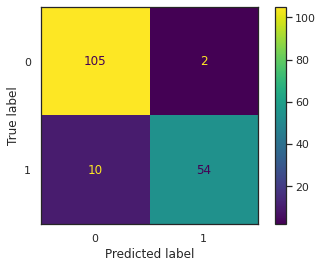

In [ ]:
predictions = gs_lda.predict(X_test_std)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gs_lda.classes_)
disp.plot()

In [ ]:
y_pred = gs_lda.predict(X_test_std)

print(classification_report(y_test, y_pred,
                            target_names=list(np.unique(df['diagnosis']))))

              precision    recall  f1-score   support

      benign       0.91      0.98      0.95       107
   malignant       0.96      0.84      0.90        64

    accuracy                           0.93       171
   macro avg       0.94      0.91      0.92       171
weighted avg       0.93      0.93      0.93       171



In [ ]:
lda_metrics = calculate_metrics(y_test, y_pred, lda_duration, 'linear discriminant analysis')
lda_metrics

accuracy                                                 0.929825
precision                                                0.964286
recall                                                    0.84375
roc_auc                                                  0.912529
f1_score                                                      0.9
cohen_kappa                                              0.846315
precision_both           [0.9130434782608695, 0.9642857142857143]
recall_both                         [0.9813084112149533, 0.84375]
fbeta_both               [0.9459459459459459, 0.8999999999999999]
support_both                                            [107, 64]
time_to_fit (seconds)                                    0.240773
Name: linear discriminant analysis, dtype: object

## Support Vector Machines

In [ ]:
from sklearn.svm import SVC

param_grid = {'C': np.power(10, np.arange(0, 3, dtype=float)),
              'kernel': ['linear', 'sigmoid', 'rbf'],
              'gamma': ['auto', 'scale']}

svc_clf = SVC(random_state=0)

gs_svc = GridSearchCV(svc_clf, param_grid=param_grid)

start = time()
gs_svc.fit(X_train_std, y_train)
svc_duration = time() - start

print("GridSearchCV of SVC took {:.2f} seconds for {} candidate parameter settings.".format(svc_duration,
                                                                                            len(gs_svc.cv_results_['params'])))
# report(gs_svc.cv_results_)
print('Optimal C: {}  Optimal kernel: {}  Optimal gamma: {}'.format(gs_svc.best_params_['C'], gs_svc.best_params_['kernel'], gs_svc.best_params_['gamma']))
print('Accuracy (train): {:.2f}'.format(gs_svc.score(X_train_std, y_train)))
print('Accuracy  (test): {:.2f}'.format(gs_svc.score(X_test_std,  y_test)))

GridSearchCV of SVC took 0.33 seconds for 18 candidate parameter settings.
Optimal C: 10.0  Optimal kernel: rbf  Optimal gamma: auto
Accuracy (train): 1.00
Accuracy  (test): 0.95


In [ ]:
svc_cv = get_cross_val(gs_svc, X_test_std, y_test, 'support vector machines')
svc_cv.round(2)

mean                  0.90
standard deviation    0.03
p025                  0.85
p975                  0.93
Name: support vector machines, dtype: float64

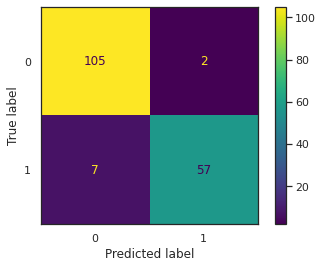

In [ ]:
predictions = gs_svc.predict(X_test_std)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gs_svc.classes_)
disp.plot()

In [ ]:
y_pred = gs_svc.predict(X_test_std)

print(classification_report(y_test, y_pred,
                            target_names=list(np.unique(df['diagnosis']))))

              precision    recall  f1-score   support

      benign       0.94      0.98      0.96       107
   malignant       0.97      0.89      0.93        64

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



In [ ]:
svc_metrics = calculate_metrics(y_test, y_pred, svc_duration, 'support vector machines')
svc_metrics

accuracy                                                0.947368
precision                                               0.966102
recall                                                  0.890625
roc_auc                                                 0.935967
f1_score                                                0.926829
cohen_kappa                                             0.885839
precision_both                      [0.9375, 0.9661016949152542]
recall_both                       [0.9813084112149533, 0.890625]
fbeta_both               [0.958904109589041, 0.9268292682926829]
support_both                                           [107, 64]
time_to_fit (seconds)                                   0.329884
Name: support vector machines, dtype: object

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators': np.arange(100, 1000, 200, dtype=int),
              'max_features': [None, 'sqrt', 'log2'],
              'criterion': ['gini', 'entropy'],
              'max_depth': [None, 3, 5, 7]}

rf_clf = RandomForestClassifier(oob_score=True, random_state=0)

gs_rf = GridSearchCV(rf_clf, param_grid=param_grid)

start = time()
gs_rf.fit(X_train_std, y_train)
rf_duration = time() - start

print("GridSearchCV of RF took {:.2f} seconds for {} candidate parameter settings.".format(rf_duration,
                                                                                           len(gs_rf.cv_results_['params'])))
# report(gs_rf.cv_results_)
print('Optimal n_estimators: {}  Optimal max_features: {}  Optimal max_depth: {}  Optimal criterion: {}'.format(gs_rf.best_params_['n_estimators'],
                                                                                                                gs_rf.best_params_['max_features'],
                                                                                                                gs_rf.best_params_['max_depth'],
                                                                                                                gs_rf.best_params_['criterion']))
print('Accuracy (train): {:.2f}'.format(gs_rf.score(X_train_std, y_train)))
print('Accuracy  (test): {:.2f}'.format(gs_rf.score(X_test_std,  y_test)))

GridSearchCV of RF took 1156.60 seconds for 120 candidate parameter settings.
Optimal n_estimators: 300  Optimal max_features: sqrt  Optimal max_depth: None  Optimal criterion: entropy
Accuracy (train): 1.00
Accuracy  (test): 0.94


In [ ]:
clf_rf = RandomForestClassifier(n_estimators=gs_rf.best_params_['n_estimators'],
                                max_features=gs_rf.best_params_['max_features'],
                                max_depth=gs_rf.best_params_['max_depth'],
                                criterion=gs_rf.best_params_['criterion'],
                                oob_score=True,
                                random_state=0)

rf_cv = get_cross_val(clf_rf, X_test_std, y_test, 'random forest')
rf_cv.round(2)

mean                  0.92
standard deviation    0.05
p025                  0.87
p975                  0.99
Name: random forest, dtype: float64

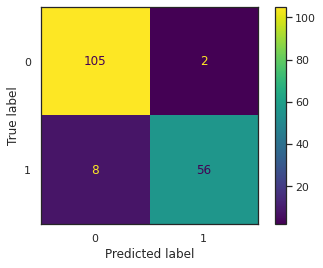

In [ ]:
predictions = gs_rf.predict(X_test_std)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gs_rf.classes_)
disp.plot()

In [ ]:
y_pred = gs_rf.predict(X_test_std)

print(classification_report(y_test, y_pred,
                            target_names=list(np.unique(df['diagnosis']))))

              precision    recall  f1-score   support

      benign       0.93      0.98      0.95       107
   malignant       0.97      0.88      0.92        64

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



In [ ]:
rf_metrics = calculate_metrics(y_test, y_pred, rf_duration, 'random forest')
rf_metrics

accuracy                                                  0.94152
precision                                                0.965517
recall                                                      0.875
roc_auc                                                  0.928154
f1_score                                                 0.918033
cohen_kappa                                              0.872749
precision_both           [0.9292035398230089, 0.9655172413793104]
recall_both                           [0.9813084112149533, 0.875]
fbeta_both               [0.9545454545454545, 0.9180327868852458]
support_both                                            [107, 64]
time_to_fit (seconds)                                 1156.603401
Name: random forest, dtype: object

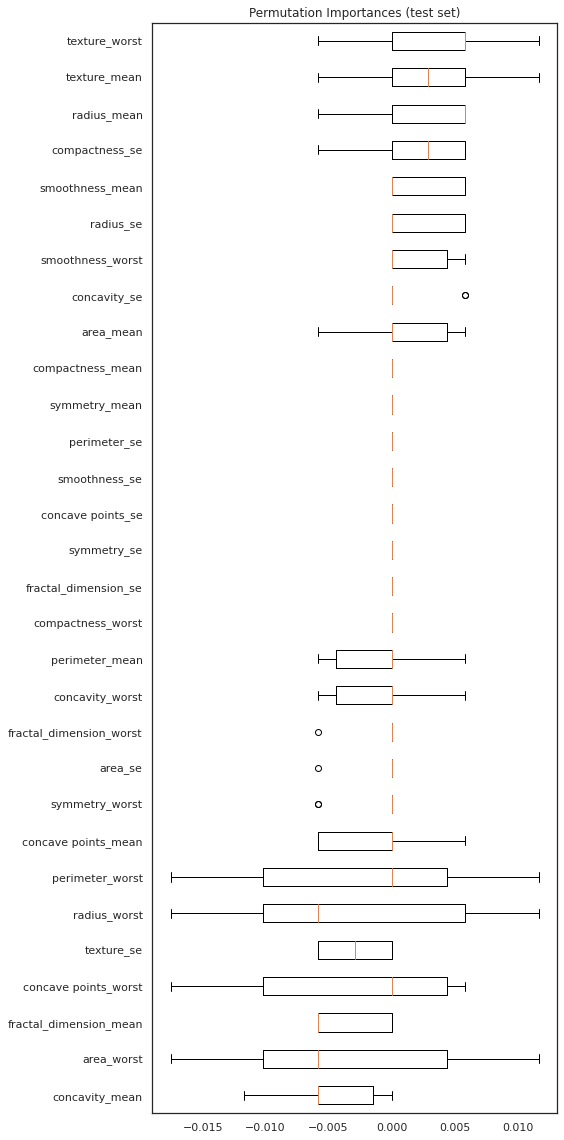

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(gs_rf, X_test_std, y_test, n_repeats=10,
                                random_state=42, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

X_test_df = pd.DataFrame(X_test_std, columns=list(df.iloc[:, 2:].columns))

f, ax = plt.subplots(figsize=(8,16))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test_df.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
plt.tight_layout();

<a id="compare_models"></a>

## Compare Models

In [ ]:
model_metrics = pd.concat([lr_metrics, knn_metrics, lda_metrics, svc_metrics, rf_metrics], axis=1).T

model_metrics.apply(lambda elem: [np.round(val, 2) for val in elem]).sort_values(by='f1_score', ascending=False)

,accuracy,precision,recall,roc_auc,f1_score,cohen_kappa,precision_both,recall_both,fbeta_both,support_both,time_to_fit (seconds)
logistic_regression,0.96,0.98,0.91,0.95,0.94,0.91,"[0.95, 0.98]","[0.99, 0.91]","[0.97, 0.94]","[107, 64]",8.06
k-nearest neighbors,0.96,0.97,0.92,0.95,0.94,0.91,"[0.95, 0.97]","[0.98, 0.92]","[0.97, 0.94]","[107, 64]",1.71
support vector machines,0.95,0.97,0.89,0.94,0.93,0.89,"[0.94, 0.97]","[0.98, 0.89]","[0.96, 0.93]","[107, 64]",0.47
random forest,0.94,0.97,0.88,0.93,0.92,0.87,"[0.93, 0.97]","[0.98, 0.88]","[0.95, 0.92]","[107, 64]",1156.60
linear discriminant analysis,0.93,0.96,0.84,0.91,0.90,0.85,"[0.91, 0.96]","[0.98, 0.84]","[0.95, 0.9]","[107, 64]",0.31


In [ ]:
cross_vals = pd.concat([lr_cv, knn_cv, lda_cv, svc_cv, rf_cv], axis=1).T

cross_vals = cross_vals.round(2).sort_values(by='mean', ascending=False)
cross_vals

,mean,standard deviation,p025,p975
logistic regression,0.93,0.03,0.88,0.96
random forest,0.92,0.05,0.87,0.99
k-nearest neighbors,0.91,0.05,0.83,0.96
linear discriminanat analysis,0.91,0.02,0.87,0.92
support vector machines,0.90,0.03,0.85,0.93


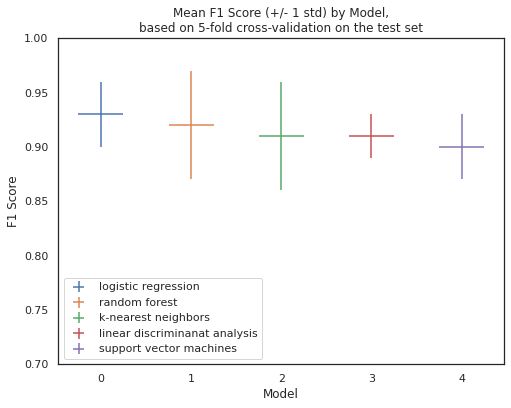

In [ ]:
fig = plt.figure(figsize=(8,6))

for i in range(len(cross_vals.index)):
    plt.errorbar(x=i, y=cross_vals.iloc[i, 0], # mean column
                 xerr=0.25,
                 yerr=cross_vals.iloc[i, 1], # standard deviation column   alternatively: [mean - p025, p975 - mean],
                 linestyle='',
                 label=list(cross_vals.index)[i])

plt.ylim(0.7,1)
plt.title('Mean F1 Score (+/- 1 std) by Model,\nbased on 5-fold cross-validation on the test set')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.legend(loc='lower left')

# Lesson & learned

## 꼭 Domain Knowledge를 아는 것이 최선일까?

### 1. Domain knowledge를 전혀 모르는 경우에도 분석에 투입이 될 수 있는 경우는 당연히 존재한다. 물론, 해당 데이터 분석을 위해서는 데이터에 대해 공부를 할 수도 있을 것이고, 인터뷰를 통해 데이터의 특성을 확보할 수도 있지만, 이는 매우 어려운 일이다.
### 2. 이러한 경우에는 데이터를 모델링할 수 있는 최소한의 형태로만 변형하고 다양한 방법을 통해 모델링 가능성을 파악하는 것이 최선일 수 있다.
#### 3. 모델의 성능이 충분히 우수하게 나온다면 모델의 결과를 통해 데이터를 분석할 수도 있다.

### 이번 챕터에서는 유방암 환자들의 데이터를 이용하여 환자의 유방암 여부(양성/음성)에 대해서 모델링하는 실습을 진행해봤다. 각 Feature가 가지고 있는 정보의 양이 충분하였기에 모델의 성능이 높게 나타남
### 다양한 모델링 방법 적용을 통해 현업에서 사용하는 다양한 알고리즘 적용에 대해서 체득하는 시간을 가져보았음